# Modelos de clasificación

El objetivo de un modelo de clasificación es asociar el elemento de entrada a una de las clases.

Existen dos tipos de ploblemas de clasificación:

*   Clasificación binaria (2 clases)
*   Clasificación multiclase (más de dos clases)

En el presente notebook se va a entrenar un modelo multiclase, específicamente una red neuronal multicapa.

In [31]:
# Cargar el framework tensorflow y verificar su versión
import tensorflow as tf
print(tf.__version__)

2.15.0


<h1>MNIST</h1>

<h2> Cargando el dataset MNIST </h2>

In [32]:
# Se importa el dataset MNIST
digit_mnist = tf.keras.datasets.mnist

# Se cargan los conjuntos de entrenamiento (*_train_whole) y de validación (*_test) en variables separadas
(X_train_whole, y_train_whole), (X_test, y_test) = digit_mnist.load_data()


In [33]:
# Impresión del número de imagenes del conjunto de entrenamiento y validación

print(f'Numero de imagenes para entrenamiento {X_train_whole.shape[0]}, de tamaño {X_train_whole.shape[1]}x{X_train_whole.shape[2]}')

Numero de imagenes para entrenamiento 60000, de tamaño 28x28


<h1> Visualización del dataset </h1>

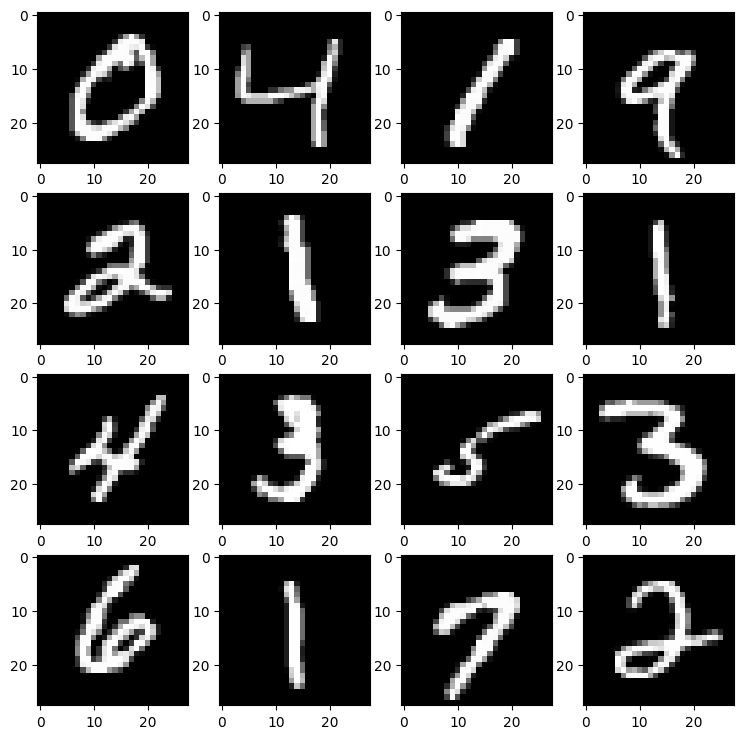

In [34]:
import matplotlib.pyplot as plt

# Tamaño de la figura
w = 9
h = 9

# Número de columnas y filas del subplot
cols = 4
rows = 4

# Creación de la figura
fig = plt.figure(figsize=(w, h))

for i in range(1, cols*rows+1):
  img = X_train_whole[i]
  fig.add_subplot(rows, cols, i)
  # Mapa de color
  # "Blues", "Blues_r", "gray"
  # "viridis" (G, Y, B), "viridis_r"
  plt.imshow(img, cmap="gray")
plt.show()

# Codificación de y-labels

<dl>
  <dt>Codificación one-hot</dt>
    <dd>En esta representación cada categoría es una secuencia de números binarios (ceros o unos). Está representación no es la más adecuada para problemas de clasificación de muchas clases</dd>
  <dt><i>Label encoding (codificación de etiquetas)</i></dt>
  <dd>Asigna un número entero a cada categoría</dd>
</dl>

El dataset MNIST maneja la codificación de etiquetas:

In [35]:
print(y_train_whole[:10])

[5 0 4 1 9 2 1 3 1 4]


## Conversión de label encoding a one-hot

Para convertir una **label encoding** a una **one-hot encoding** se puede usar la librería *scikit-learn* o *keras*.

### Librería scikit-learn
Se utiliza el método **OneHotEncoder**, que se encuentra en el módulo *preprocessing*.

In [36]:
# Conversión a one-hot encoding

from sklearn.preprocessing import OneHotEncoder

# Definición del codificador One-hot
one_hot_enc = OneHotEncoder()

# Cambiar la forma de la matriz de las etiquetas
y_train_whole_sh = y_train_whole.reshape(-1, 1)

# Ajustar y entrenar las etiquetas
# Forma 1
# fit - Aprende los parámetros de escalado del conjunto de datos de entrada, media y varianza
# transform - Transforma los datos empleando la media y varianza que se calcula en el método fit
# toarray - convierte a una matriz dispersa
one_hot_enc.fit(y_train_whole_sh)
y_train_onehot = one_hot_enc.transform(y_train_whole_sh).toarray()

# Forma 2
# fit_transform
#  1. Aprende los parámetros de escalado de esos datos, media y varianza del conjunto de entrenamiento
#  2. Tranforma los datos
y_train_oh = one_hot_enc.fit_transform(y_train_whole_sh).toarray()

print(y_train_onehot[0])
print(y_train_oh[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [37]:
from tensorflow.keras.utils import to_categorical

Y_test_oh = to_categorical(y_test, num_classes=10)

print(Y_test_oh[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## Dataset para entrenamiento

Para el entrenamiento del modelo, dividir *X_train_whole* y *y_train_whole* en dos conjuntos: el de entrenamiento y el de validación. Generalmente se toma el 80% para entrenamiento y el resto (20%) para validación.

**División lineal**

Se realiza de manera "manual", esto es mediante índices.

Para nuestro conjunto, se asume que *X_train_whole* es un arreglo de imágenes y se divide mediante un índice, donde la primera parte es para entrenar y la segunda para validar.

In [38]:
X_valid, X_train = X_train_whole[:12000], X_train_whole[12000:]
y_valid, y_train = y_train_whole[:12000], y_train_whole[12000:]
print(f'Número de elementos para entrenar: {X_train.shape}')
print(f'Número de elementos para validar: {X_valid.shape}')

Número de elementos para entrenar: (48000, 28, 28)
Número de elementos para validar: (12000, 28, 28)


**División aleatoria con train_test_split </h2>**

La librería *scikit-learn* en el módulo *model_selection* ofrece una herramienta denominada **train_test_split** que divide un arreglo o matriz de manera aleatoria en dos subconjuntos: de entrenamiento y validación

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>
Parámetros:<br>
<b>arrays</b>: pueden ser una lista, arreglo, matrices o dataframes de pandas<br>
<b>test_size</b>: valor entre 0.0 y 1.0 que representa la proporción del conjunto de entrenamiento en la que se dividirá<br>
<b>random_state</b>: valor entero que representa una semilla aleatoria<br>
<b>shuffle</b>: booleano que indica si el conjunto de entrenamiento se divide de manera lineal (False) o de manera aleatoria (True)<br>

In [39]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_train_whole, y_train_whole, test_size=0.2, random_state=42)
print(f'Número de elementos para entrenar {X_train_1.shape[0]}')
print(f'Número de elementos para validar {X_test_1.shape[0]}')

Número de elementos para entrenar 48000
Número de elementos para validar 12000


<h2>Normalización de datos</h2>

Los datos se redimensionan en un rango de 0 a 1.

In [40]:
print("Valores sin normalizar")
print(X_valid[0,10,8:15])

# Conjuntos de entrenamiento y validación para generar el modelo
X_train = X_train / 255.0
X_valid = X_valid / 255.0
# Conjunto de pruebas
X_test = X_test / 255.0

print("Valores normalizados")
print(X_valid[0,10,8:15])


Valores sin normalizar
[  0  14   1 154 253  90   0]
Valores normalizados
[0.         0.05490196 0.00392157 0.60392157 0.99215686 0.35294118
 0.        ]


# Red neuronal (modelo)

**Keras** es una librería que funciona sobre **Tensorflow** y permite definir modelos de manera sencilla.

**Modelo secuencial**<br>

Modelo que se compone de una pila de capas, donde cada capa tiene un tensor (arreglo) de entrada y un tensor de salida. Se usa

<center>
<b>keras.Sequential()</b>
</center>

para definir un modelo secuencial




Para el dataset MNIST, las capas que se van a definir son:
<dl>
  <dt><b>Dense</b></dt>
  <dd>Capa de neuronas densamente conectada<br>
     Argumentos:
     <ul>
      <li><b>units</b> Valor entero positivo e indica la dimensionalidad de salida
     <li><b>activation=None</b> Función de activación, por default "linear" (a(x)=x)
     </ul>
     https://keras.io/api/layers/core_layers/dense/
  </dd>
  <dt><b>Flatten</b></dt>
  <dd> Convierte un arreglo bidimensional (matrix) a un vector <br>
      <b>input_shape</b> Indica el tamaño (dimensiones) de un elemento del conjunto de entrada
  </dd>
</dl>

<h2>Funciones de activación</h2>

<dl>
  <dt><b>relu</b></dt>
  <dd>Si X>0 devuelve X, si no, devuelve 0</dd>
  <dt><b>softmax</b></dt>
  <dd>Generalmente se emplea en la última capa de una red de clasificación (más de 2 clases), debido a que el resultado se puede interpretar como una distribución de probabilidad.</dd>
  <dt><b>sigmoid</b></dt>
  <dd>Función de activación sigmoide, la cual retorna valores entre 0 y 1. Además, esta función es equivalente <b>softmax</b> de dos clases (clasificación binaria)</dd>
</dl>

https://keras.io/api/layers/activations/

<h1>Definición de la arquitectura</h1>

In [41]:
# Codigo para definir un modelo
model = tf.keras.models.Sequential()
# Capa de entrada
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
# Capas ocultas
model.add(tf.keras.layers.Dense(100, activation='relu'))
# Capa de salida
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Número de parámetros

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


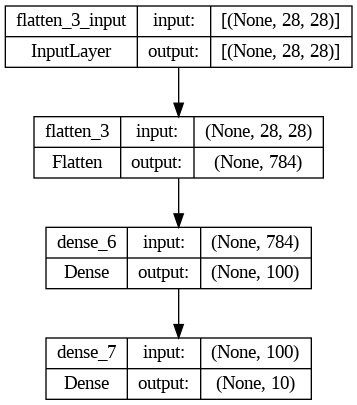

In [43]:
# !pip install pydot
tf.keras.utils.plot_model(model, to_file="prueba.png", show_shapes=True)

<h1>Compilar red</h1>

**model.compile**<br>

Parámetros: <br>

<dl>
  <dt><b>optimizer</b></dt>
  <dd>Algoritmo de optimización que se utiliza para entrenar la red. El descenso del gradiente estocástico (<b>sgd</b>) es un ejemplo de estos algoritmos.<br>
  (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)</dd>
  <dt><b>loss</b></dt>
  <dd>La función de pérdida se emplea para evaluar la red durante el entrenamiento y por lo tanto su valor se minimiza.
  https://www.tensorflow.org/api_docs/python/tf/keras/losses
  </dd>
  <dt><b>metrics</b></dt>
  <dd>Métricas para la evaluación (desempeño) del modelo, después de que se entreno. Por ejemplo <b>accuracy</b><br>
  https://www.tensorflow.org/api_docs/python/tf/keras/metrics
  </dd>
</dl>

NOTAS:

<ol>
  <li> Para modelos de clasificación dependiendo de la códificación de las etiquetas, la función de perdida que se puede usar es:
  <ul>
    <li> "label encoding" emplea <b>sparse_categorical_crossentropy</b>
    <li> "one-hot encoding" emplea <b>categorical_crossentropy</b>
  </ul>
  <li> <i>accuracy </i> calcula la efectividad del modelo, es decir, divide el númedo de inferencias correctas sobre el número de inferencias
</ol>


In [44]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = "sgd",
              metrics = ["accuracy"]
              )

<h1>Entrenamiento del modelo</h1>

<b>model.fit</b><br>

Entrena el modelo durante un número de épocas (iteraciones en el dataset)

Parámetros<br>

*   <b>epochs</b>. Número de epocas para entrenar el modelo
*   <b>validation_data</b>. Conjunto de datos que se emplean para evaluar la perdida al final de cada epoca.
*   <b>batch_size</b>. Número de muestras para actualización del gradiente
*   <b>verbose</b>. Salida del proceso de entrenamiento (0, 1, 2)


In [45]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    verbose=1,
    batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7028 - accuracy: 0.8250 - val_loss: 0.3902 - val_accuracy: 0.8967
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3628 - accuracy: 0.8995 - val_loss: 0.3228 - val_accuracy: 0.9102
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3135 - accuracy: 0.9112 - val_loss: 0.2902 - val_accuracy: 0.9180
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2842 - accuracy: 0.9196 - val_loss: 0.2698 - val_accuracy: 0.9239
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2625 - accuracy: 0.9263 - val_loss: 0.2519 - val_accuracy: 0.9272


<h1>Evaluación del modelo</h1>

<b>model.evaluate</b><br>

Retorna el valor de pérdida y los valores de las métricas del modelo. Sus argumentos de entrada son el dataset de prueba.


In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2416 - accuracy: 0.9305


[0.24156469106674194, 0.9304999709129333]

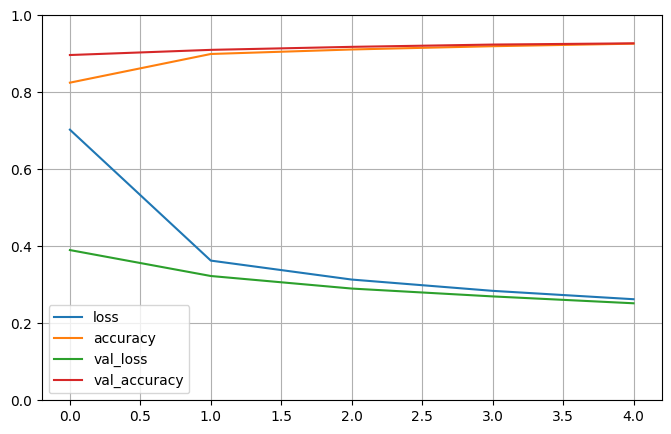

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<h1>Guardar modelo</h1>

In [48]:
model.save('number_model.h5', save_format='h5')
# model.save('number_model', save_format='tf')
# model.save('number_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h1>Cargar modelo</h1>

In [49]:
from tensorflow.keras.models import load_model
new_model = load_model('number_model.h5')

<h1>Predicciones</h1>

<b>model.predit</b>
<br>
Retorna las predicciones del conjunto de datos de entrada.

In [50]:
import numpy as np

clas = model.predict(X_test)
clas_ = new_model.predict(X_test)
print(clas[0])
print(clas_[0])

classes = np.argmax(clas, axis = 1)
print(f'Predict {classes[0]} True label {y_test[0]}')

313/313 [==============================] - 1s 2ms/step
[6.8286208e-05 3.8592893e-07 3.0880427e-04 6.1808171e-04 2.7652011e-06
 4.1153762e-05 7.2497301e-08 9.9805051e-01 1.4062898e-05 8.9588843e-04]
[6.8286208e-05 3.8592893e-07 3.0880427e-04 6.1808171e-04 2.7652011e-06
 4.1153762e-05 7.2497301e-08 9.9805051e-01 1.4062898e-05 8.9588843e-04]
Predict 7 True label 7


<h1>Parada anticipada</h1>


El entrenamiento del modelo se detiene cuando se cumple una condición con base en la pérdida o accuracy.

In [51]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
      self.model.stop_training = True

In [52]:
# Definir modelo

layers_stop = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Capa_entrada"),
    tf.keras.layers.Dense(300, activation='relu', name="Capa_oculta"),
    tf.keras.layers.Dense(10, activation='softmax', name="Capa_salida")
]

model_stop = tf.keras.Sequential(layers_stop, name="Modelo_2")

In [53]:
# Compilar red

model_stop.compile(loss='sparse_categorical_crossentropy',
              optimizer = "sgd",
              metrics = ["accuracy"]
              )

In [54]:
callbacks = myCallback()
# Entrenar modelo
model_stop.fit(
    X_train, y_train,
    epochs=10,
    callbacks=[callbacks] )

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6890 - accuracy: 0.8312
Epoch 2/10
1484/1500 [============================>.] - ETA: 0s - loss: 0.3507 - accuracy: 0.9031
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3498 - accuracy: 0.9034
